In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
import codecs
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数

In [2]:
filePath = "../Kaggle_Dataset/kickstarter-projects/ks-projects-201612.csv"
#dtypeDict = {"ID ":"int64", "name ":"object", "category ":"object", "main_category ":"object",
#             "currency ":"object", "goal ":"int64", "pledged ":"int64", "state ":"object", "backers ":"int64", 
#             "country ":"object", "usd pledged ":"int64"}
#cd = codecs.open(filePath, "r","Shift-JIS","ignore")
#df = pd.read_table(cd,",",low_memory=False, dtype=dtypeDict, parse_dates=[5,7])
#df = pd.read_csv(filePath, encoding="cp437",sep=',', low_memory=False, parse_dates=[5,7],dtype=dtypeDict)
df = pd.read_csv(filePath, encoding="cp437",sep=',', low_memory=False)
#encoding: <https://docs.python.org/2/library/codecs.html#standard-encodings>
display(df.head(3))
df.describe()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN


,ID,Unnamed: 16
count,3.237500e+05,1.0
mean,1.074943e+09,25.0
std,6.193352e+08,NaN
min,5.971000e+03,25.0
25%,5.375802e+08,25.0
50%,1.075818e+09,25.0
75%,1.611070e+09,25.0
max,2.147476e+09,25.0


In [3]:
#使用不可な列削除
df = df.drop(columns="ID ")
df = df.drop(columns="name ")
df = df.drop(columns="backers ")
df = df.drop(columns="pledged ")
df = df.drop(columns="usd pledged ")
df = df.drop(columns="Unnamed: 13")
df = df.drop(columns="Unnamed: 14")
df = df.drop(columns="Unnamed: 15")
df = df.drop(columns="Unnamed: 16")

#df = df.drop(columns="currency ")
#df = df.drop(columns="country ")
df = df.drop(columns="category ")


display(df.head(3))


,main_category,currency,deadline,goal,launched,state,country
0,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,failed,GB
1,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,failed,US
2,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,failed,US


In [4]:
#state値をダミーの値に置換
colName="state "
df[colName] = df[colName].replace("failed",-1)
df[colName] = df[colName].replace("successful",-2)
df[colName]=pd.to_numeric(df[colName], errors="coerce")
df.loc[np.isnan(df[colName]),colName]=0 #数値変換できなかった値を0とする
df.loc[df[colName]>0,colName]=0 #正の数値は文字列型で入っていたイレギュラーなので0とする
df=df[df[colName]!=0]   #余計な値(0)を削除

df.loc[df[colName]==-2,colName]=1 #0:失敗  1:成功 に分類
df.loc[df[colName]==-1,colName]=0

df[colName].value_counts()

0.0    168221
1.0    113081
Name: state , dtype: int64

In [5]:
#目標額の数値化
colName="goal "
df[colName]=pd.to_numeric(df[colName], errors="coerce")
df.loc[np.isnan(df[colName]),colName]=0
df=df[df[colName]!=0]   #余計な値を削除

In [6]:
#main_category値をダミーの値に置換
colName="main_category "
df[colName] = df[colName].replace("Film & Video",1)
df[colName] = df[colName].replace("Music",2)
df[colName] = df[colName].replace("Publishing",3)
df[colName] = df[colName].replace("Games",4)
df[colName] = df[colName].replace("Technology",5)
df[colName] = df[colName].replace("Art",6)
df[colName] = df[colName].replace("Design",7)
df[colName] = df[colName].replace("Food",8)
df[colName] = df[colName].replace("Fashion",9)
df[colName] = df[colName].replace("Theater",10)
df[colName] = df[colName].replace("Photography",11)
df[colName] = df[colName].replace("Comics",12)
df[colName] = df[colName].replace("Crafts",13)
df[colName] = df[colName].replace("Journalism",14)
df[colName] = df[colName].replace("Dance",15)
df[colName] = df[colName].replace("Fiction",16)
df[colName] = df[colName].replace("Product Design",17)
df[colName] = df[colName].replace("Documentary",18)
df[colName] = df[colName].replace("Nonfiction",19)
df[colName] = df[colName].replace("Children's Books",20)
df[colName] = df[colName].replace("Tabletop Games",21)
df[colName] = df[colName].replace("Shorts",22)
df[colName] = df[colName].replace("Video Games",23)
df[colName] = df[colName].replace("Mixed Media",24)
df[colName] = df[colName].replace("Apparel",25)
df[colName] = df[colName].replace("Art Books",26)
df[colName] = df[colName].replace("Narrative Film",27)
df[colName] = df[colName].replace("Web",28)
df[colName]=pd.to_numeric(df[colName], errors="coerce")
df.loc[np.isnan(df[colName]),colName]=29
df[colName].value_counts()

1     51057
2     40956
3     30175
4     22398
6     21746
5     21409
7     19998
8     18858
9     15810
10     9327
11     8646
12     7905
13     6301
14     3526
15     3190
Name: main_category , dtype: int64

In [7]:
colName="currency "
df[colName] = df[colName].replace('USD' ,1)
df[colName] = df[colName].replace('GBP' ,2)
df[colName] = df[colName].replace('CAD' ,3)
df[colName] = df[colName].replace('EUR' ,4)
df[colName] = df[colName].replace('AUD' ,5)
df[colName] = df[colName].replace('SEK' ,6)
df[colName] = df[colName].replace('NZD' ,7)
df[colName] = df[colName].replace('DKK' ,8)
df[colName] = df[colName].replace('NOK' ,9)
df[colName] = df[colName].replace('CHF' ,10)
df[colName] = df[colName].replace('SGD' ,11)
df[colName] = df[colName].replace('HKD' ,12)
df[colName] = df[colName].replace('MXN' ,13)
df[colName]=pd.to_numeric(df[colName], errors="coerce")
df.loc[np.isnan(df[colName]),colName]=0 #数値変換できなかった値を0とする
df=df[df[colName]!=0]   #余計な値(0)を削除
df[colName].value_counts()

1     229517
2      23842
3       9904
4       9177
5       5188
6       1066
7        992
8        675
9        432
10       389
11        69
12        47
13         4
Name: currency , dtype: int64

In [8]:
colName="country "
df[colName] = df[colName].replace('US' ,1)
df[colName] = df[colName].replace('GB' ,2)
df[colName] = df[colName].replace('CA' ,3)
df[colName] = df[colName].replace('AU' ,4)
df[colName] = df[colName].replace('DE' ,5)
df[colName] = df[colName].replace('NL' ,6)
df[colName] = df[colName].replace('FR' ,7)
df[colName] = df[colName].replace('IT' ,8)
df[colName] = df[colName].replace('ES' ,9)
df[colName] = df[colName].replace('SE' ,10)
df[colName] = df[colName].replace('NZ' ,11)
df[colName] = df[colName].replace('DK' ,12)
df[colName] = df[colName].replace('IE' ,13)
df[colName] = df[colName].replace('NO' ,14)
df[colName] = df[colName].replace('CH' ,15)
df[colName] = df[colName].replace('BE' ,16)
df[colName] = df[colName].replace('AT' ,17)
df[colName] = df[colName].replace('SG' ,18)
df[colName] = df[colName].replace('HK' ,19)
df[colName] = df[colName].replace('LU' ,20)
df[colName] = df[colName].replace('MX' ,21)
df[colName]=pd.to_numeric(df[colName], errors="coerce")
df.loc[np.isnan(df[colName]),colName]=0 #数値変換できなかった値を0とする
df=df[df[colName]!=0]   #余計な値(0)を削除
df[colName].value_counts()

1.0     229366
2.0      23820
3.0       9899
4.0       5183
5.0       2130
6.0       1869
7.0       1557
8.0       1394
9.0       1089
10.0      1065
11.0       992
12.0       672
13.0       472
14.0       430
15.0       389
16.0       329
17.0       283
18.0        69
19.0        47
20.0        33
21.0         4
Name: country , dtype: int64

In [9]:
#日付型に変換
df["deadline "] = pd.to_datetime(df["deadline "],errors="coerce")
df["launched "] = pd.to_datetime(df["launched "],errors="coerce")

In [10]:
#期間列の追加してみる
df["tPeriod"] = df["deadline "].values - df["launched "].values
df["tPeriod"] = df["tPeriod"].dt.total_seconds()/60/60/24
#1日当たりのノルマ列を追加してみる
df["Norma"] = df["goal "]/df["tPeriod"]

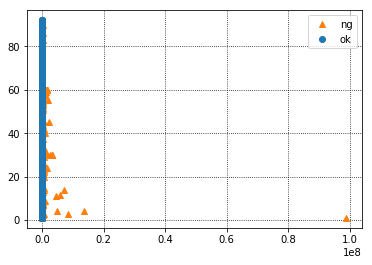

In [11]:
#グラフの表示
df_ok = df[df["state "]==1]
df_ng = df[df["state "]==0]

plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(df_ng["Norma"], df_ng["tPeriod"], '^',color="C1", label="ng")
plt.plot(df_ok["Norma"], df_ok["tPeriod"], 'o',color="C0", label="ok")
plt.legend(loc = "best")
plt.show()


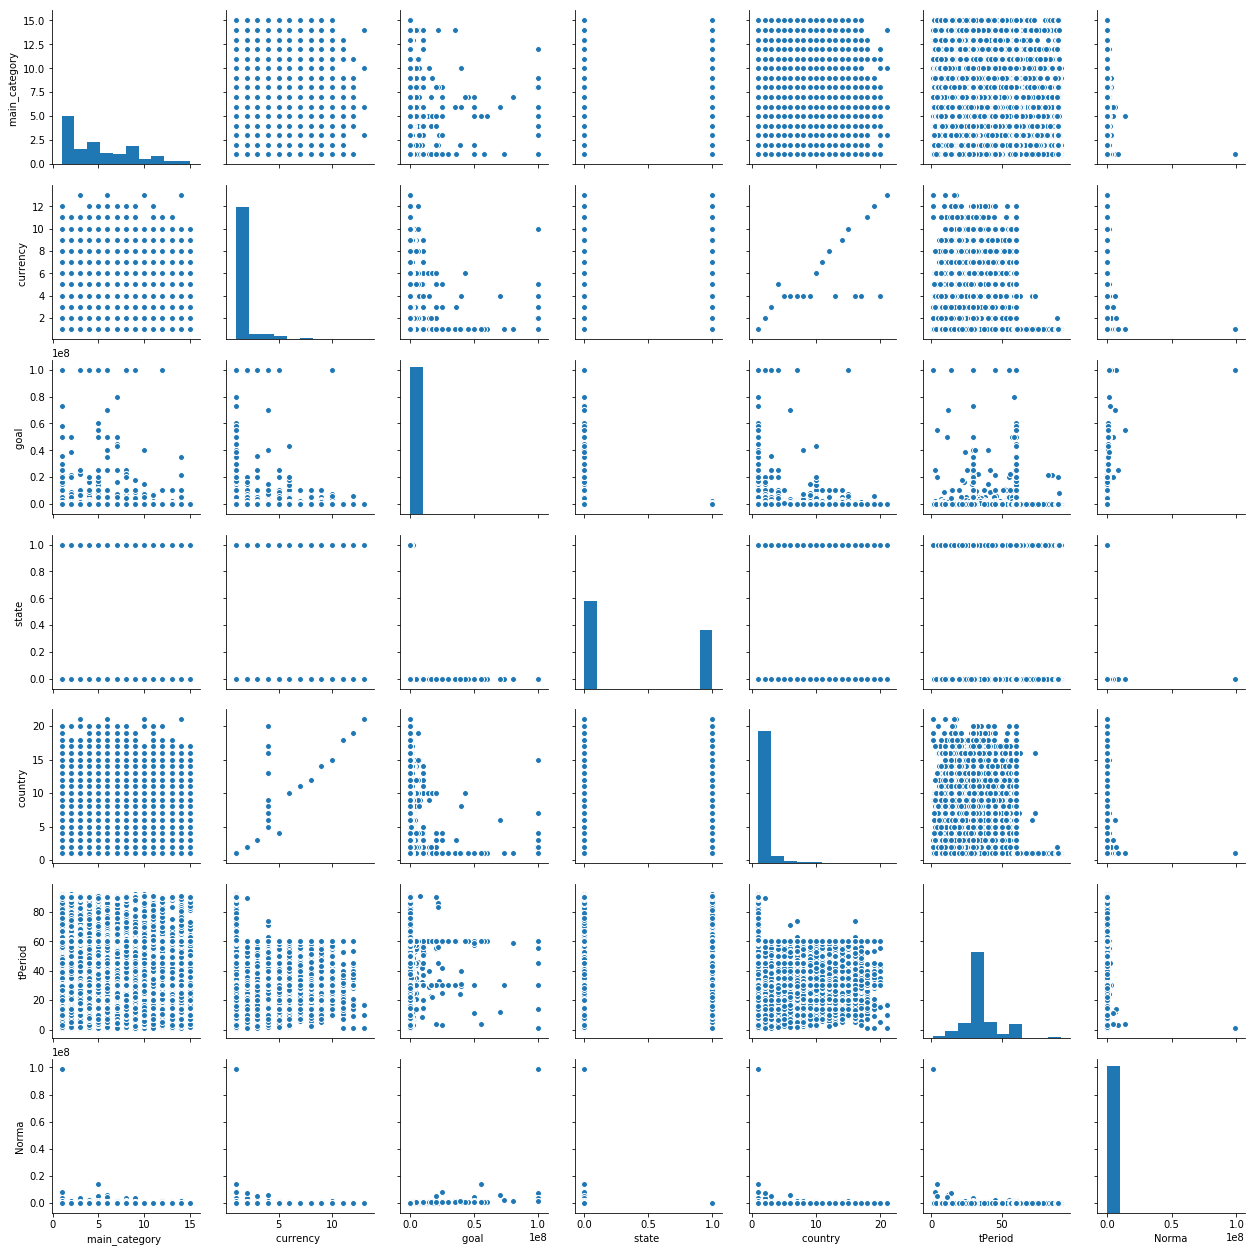

In [12]:
#散布図行列
sns.pairplot(df)
plt.show()

In [13]:
#相関係数
df_corr=df.corr()
print(df_corr)

                main_category   currency      goal     state   country   \
main_category         1.000000   0.047088 -0.006796 -0.033602  0.041204   
currency              0.047088   1.000000  0.015259 -0.073691  0.891168   
goal                 -0.006796   0.015259  1.000000 -0.025281  0.014274   
state                -0.033602  -0.073691 -0.025281  1.000000 -0.068858   
country               0.041204   0.891168  0.014274 -0.068858  1.000000   
tPeriod              -0.049411  -0.018902  0.022059 -0.112294 -0.008964   
Norma                -0.003263   0.001491  0.327722 -0.005567  0.001487   

                 tPeriod     Norma  
main_category  -0.049411 -0.003263  
currency       -0.018902  0.001491  
goal            0.022059  0.327722  
state          -0.112294 -0.005567  
country        -0.008964  0.001487  
tPeriod         1.000000 -0.005266  
Norma          -0.005266  1.000000  


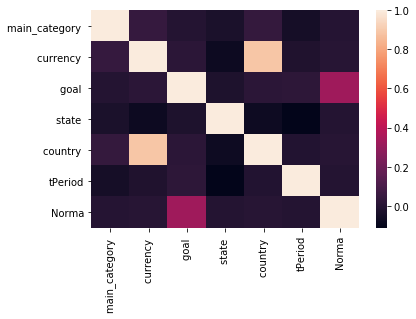

In [14]:
#相関係数ヒートマップ
sns.heatmap(df_corr)
plt.show()

In [15]:
#ロジスティック回帰
y=df["state "].values
X=df[["main_category ","currency ","goal ","country ","tPeriod","Norma"]].values

clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X,y)

#重み取り出し
w0=clf.intercept_[0]
w1=clf.coef_[0,0]
w2=clf.coef_[0,1]
w3=clf.coef_[0,2]
w4=clf.coef_[0,3]
w5=clf.coef_[0,4]
w6=clf.coef_[0,5]

print("w0: ", w0, "w1: ", w1, "w2: ", w2, "w3: ", w3, "w4: ", w4, "w5: ", w5, "w6:",w6)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


w0:  3443.170863669799 w1:  38.341534323751894 w2:  891.0535541824014 w3:  2.2673756725068057 w4:  54.45583798603689 w5:  0.21749498650154592 w6: -103.61551898766868


In [16]:
#予測
y_mdl = clf.predict(X)
print("対数尤度: ", -log_loss(y,y_mdl))
print("正答率: ", 100*accuracy_score(y,y_mdl))

conf_mat = pd.DataFrame(confusion_matrix(y,y_mdl),
                       index=["正解=ng","正解=ok"],
                       columns=["予測=ng","予測=ok"])
conf_mat

対数尤度:  -16.31097020327648
正答率:  52.77560371693254


,予測=ng,予測=ok
正解=ng,83195,84921
正解=ok,47823,65153


In [17]:
#モデル評価
mse = mean_squared_error(y, y_mdl) 
print("MSE = %s"%round(mse,3) )  

mae = mean_absolute_error(y, y_mdl) 
print("MAE = %s"%round(mae,3) )

rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_mdl)

print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))


MSE = 0.472
MAE = 0.472
RMSE = 0.687
